<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
InteractiveShell.ast_node_interactivity = 'all'

# **Лабораторная работа №6**

**Exercise #6.1**

In this chapter I claim that analyze1 takes time proportional
to $n^3$ and analyze2 takes time proportional to $n^2$. To see if that’s true, run
them on a range of input sizes and time them. In Jupyter, you can use the
“magic command” %timeit.
If you plot run time versus input size on a log-log scale, you should get a
straight line with slope 3 for analyze1 and slope 2 for analyze2. You also might want to test dct_iv and scipy.fftpack.dct

In [22]:
def analyze1(ys, fs, ts):
  args = np.outer(ts, fs)
  M = np.cos(PI2 * args)
  amps = np.linalg.solve(M, ys)
  return amps

def analyze2(ys, fs, ts):
  args = np.outer(ts, fs)
  M = np.cos(PI2 * args)
  amps = np.dot(M, ys) / 2
  return amps

Создадим сгнал, на котором будем тестировать функции:

In [29]:
signal =  UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)

Протестируем фунуции:

In [36]:
ns = 2 ** np.arange(6, 13)

results = []
for N in ns:
  ts = (0.5 + np.arange(N)) / N
  freqs = (0.5 + np.arange(N)) / 2
  ys = noise.ys[:N]
  result = %timeit -r1 -o analyze1(ys, freqs, ts)
  results.append(result)
best_analyze1 = [result.best for result in results]

The slowest run took 6.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 1: 344 µs per loop
1000 loops, best of 1: 1.18 ms per loop
100 loops, best of 1: 7.36 ms per loop
10 loops, best of 1: 24.1 ms per loop
10 loops, best of 1: 91.6 ms per loop
1 loop, best of 1: 422 ms per loop
1 loop, best of 1: 2.33 s per loop
10000 loops, best of 1: 133 µs per loop
1000 loops, best of 1: 770 µs per loop
100 loops, best of 1: 4.7 ms per loop
100 loops, best of 1: 13.3 ms per loop
10 loops, best of 1: 46.3 ms per loop
10 loops, best of 1: 160 ms per loop
1 loop, best of 1: 491 ms per loop


In [38]:
results = []
for N in ns:
  ts = (0.5 + np.arange(N)) / N
  freqs = (0.5 + np.arange(N)) / 2
  ys = noise.ys[:N]
  result = %timeit -r1 -o analyze2(ys, freqs, ts)
  results.append(result)
best_analyze2 = [result.best for result in results]

10000 loops, best of 1: 133 µs per loop
1000 loops, best of 1: 768 µs per loop
100 loops, best of 1: 4.8 ms per loop
100 loops, best of 1: 13.8 ms per loop
10 loops, best of 1: 47.8 ms per loop
10 loops, best of 1: 159 ms per loop
1 loop, best of 1: 486 ms per loop


In [43]:
import scipy.fftpack

results = []
for N in ns:
  ys = noise.ys[:N]
  result = %timeit -r1 -o scipy.fftpack.dct(ys, type=3)
  results.append(result)
best3 = [result.best for result in results]

The slowest run took 450.01 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 6.72 µs per loop
The slowest run took 7.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 6.9 µs per loop
The slowest run took 6.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 7.91 µs per loop
The slowest run took 73.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 10.4 µs per loop
The slowest run took 44.78 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 14.4 µs per loop
The slowest run took 30.66 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 1: 24.8 µs per loop
The slowest run took 18.71 times long

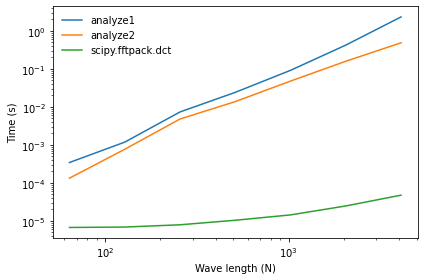

In [46]:
plt.plot(ns, best_analyze1, label='analyze1')
plt.plot(ns, best_analyze2, label='analyze2')
plt.plot(ns, best3, label='scipy.fftpack.dct')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)

Реализация scipy.fftpack.dct оказалась самой быстрой.

In [48]:
from scipy.stats import linregress

linregress(np.log(ns), np.log(best_analyze1))

LinregressResult(slope=2.0988831666218455, intercept=-16.77280375741569, rvalue=0.9988127390287844, pvalue=9.322728513457473e-08, stderr=0.045780268933225315)

LinregressResult(slope=1.9355943733135543, intercept=-16.549247810712217, rvalue=0.9948189772380318, pvalue=3.7007190763059044e-06, stderr=0.08845956170008229)

LinregressResult(slope=0.4650332617884467, intercept=-14.147078926960983, rvalue=0.9474355121362737, pvalue=0.001182617886256559, stderr=0.07023071942955393)

In [49]:
linregress(np.log(ns), np.log(best_analyze2))

LinregressResult(slope=1.9355943733135543, intercept=-16.549247810712217, rvalue=0.9948189772380318, pvalue=3.7007190763059044e-06, stderr=0.08845956170008229)

In [50]:
linregress(np.log(ns), np.log(best3))

LinregressResult(slope=0.4650332617884467, intercept=-14.147078926960983, rvalue=0.9474355121362737, pvalue=0.001182617886256559, stderr=0.07023071942955393)

Время исполнения analyze1 ближе к $n^2$ чем к ожидаемому $n^3$. Возможно, это объясняется малым размером массива ns.

**Exercise #6.2**

One of the major applications of the DCT is compression for
both sound and images. In its simplest form, DCT-based compression works
like this:
1. Break a long signal into segments.
2. Compute the DCT of each segment.
3. Identify frequency components with amplitudes so low they are inaudible, and remove them. Store only the frequencies and amplitudes that
remain.
4. To play back the signal, load the frequencies and amplitudes for each
segment and apply the inverse DCT.
Implement a version of this algorithm and apply it to a recording of music
or speech. How many components can you eliminate before the difference is
perceptible?

Загрузим аудиозапись:

In [51]:
if not os.path.exists("trumpet.wav"):
  !wget https://github.com/CliffBooth/telecom_labs/raw/main/samples/trumpet.wav
wave = read_wave('trumpet.wav')
wave.make_audio()

--2022-04-22 11:39:41--  https://github.com/CliffBooth/telecom_labs/raw/main/samples/trumpet.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/trumpet.wav [following]
--2022-04-22 11:39:41--  https://raw.githubusercontent.com/CliffBooth/telecom_labs/main/samples/trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 806478 (788K) [audio/wav]
Saving to: ‘trumpet.wav’

trumpet.wav         100%[===================>] 787.58K  --.-KB/s    in 0.04s   

2022-04-22 11:39:41 (17.7 MB/s) - ‘trumpet.wav’ saved [806478/806478]



возьмем короткий сегмент:

In [54]:
segment = wave.segment(0.5, 0.5)
segment.make_audio()

Построим ДКП этого сегмента:

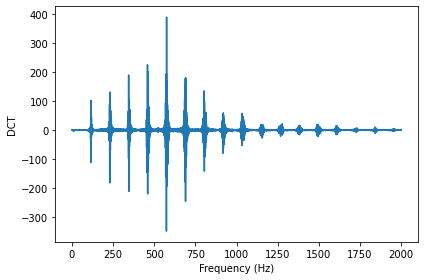

In [58]:
seg_dct = segment.make_dct()
seg_dct.plot(high=2000)
decorate(xlabel='Frequency (Hz)', ylabel='DCT')

Напишем функцию сжатия, кторая будет обнулять элементы ниже порогового значения

In [59]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1
            
    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

После применения этой функции к сегменту, у нас исчезают более чем 90% всех элементов

20542	22050	93.16099773242631


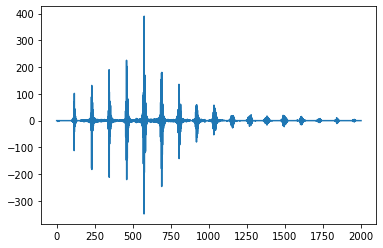

In [86]:
seg_dct = segment.make_dct()
compress(seg_dct, thresh=2)
seg_dct.plot(high=2000)

При этом звук практически не изменился

In [87]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

**Exercise #6.3**

In the repository for this book you will find a Jupyter notebook
called phase.ipynb that explores the effect of phase on sound perception.
Read through this notebook and run the examples. Choose another segment
of sound and run the same experiments. Can you find any general relationships
between the phase structure of a sound and how we perceive it?

In [88]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=500, offset=0)
wave = signal.make_wave(duration=0.5, framerate=40000)
wave.make_audio()

Выберем другой фрагмент волны:

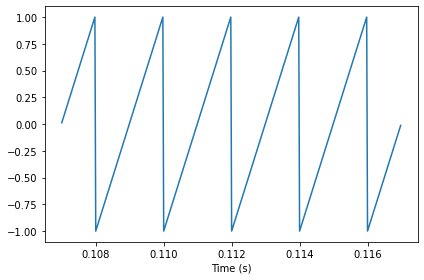

In [100]:
wave.segment(start=0.107, duration=0.01).plot()
decorate(xlabel='Time (s)')

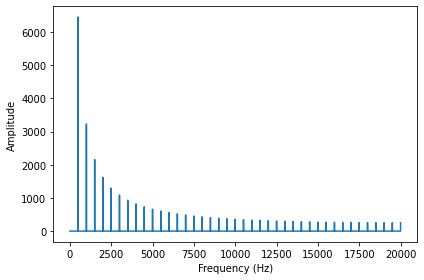

In [101]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

In [102]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')

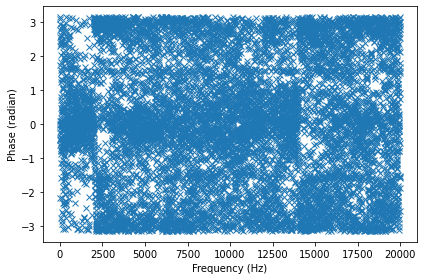

In [103]:
plot_angle(spectrum, thresh=0)

Если мы выберем только те частоты, у которых значения амплитуды превышают порог, мы увидим определенную структуру

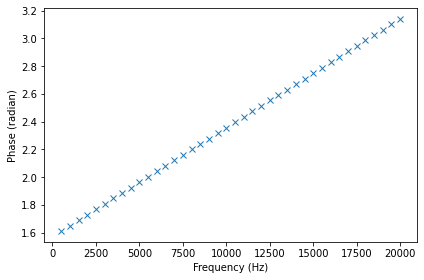

In [107]:
plot_angle(spectrum, thresh=1)

Функция, которая строит амплитуды, углы и волну:

In [110]:
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

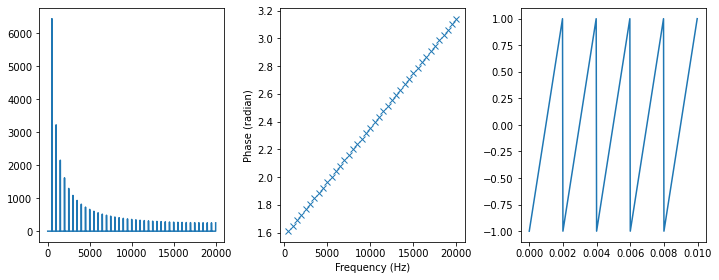

In [111]:
plot_three(spectrum)

Зададим все углы равными 0:

In [115]:
def zero_angle(spectrum):
  res = spectrum.copy()
  res.hs = res.amps
  return res

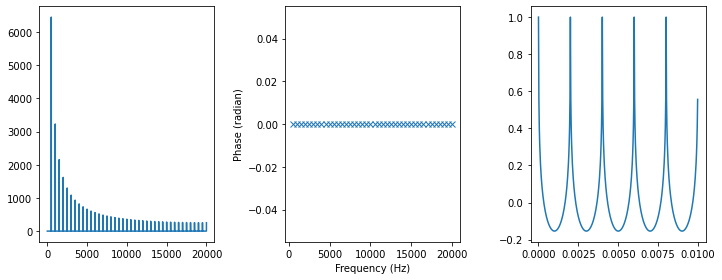

In [116]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2)

Амлитуды не поменялись, все углы равны 0, волна теперь выглядит совсем по другому, но звучит также

In [119]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

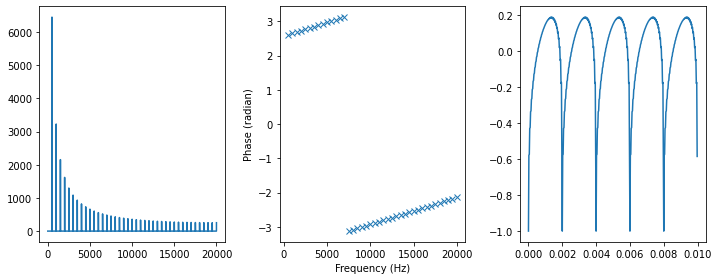

In [120]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

При повороте угла, мы опять видим, что волна изменилась, но звучит также

Посмотрим, что произайдет, если значениям углов присвоить случайные значения

In [121]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

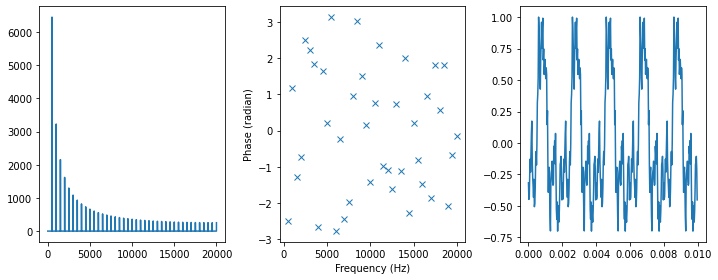

In [122]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4)

Опять же, форма волны сильно изменилась, но звучание остается как прежде.

Выводы: для звуков с гармонической структурой мы не замечаем измений в фазавой структуре, при условии, что гармоническая структура не меняется.